In [134]:
# Carga inicial de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [232]:
def escalar(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(tenerife)
    
    return df_scaled;

def get_x_y_train(train_data, loop_back):
    # Split the data into x_train and y_train data sets
    # We create a supervised "problem"
    x_train = []
    y_train = []
    trainingdatasize = len(train_data) 
    for i in range(loop_back, trainingdatasize):
        #print(i)
        #contains loop_back values 0-loop_back
        x_train.append(train[i-loop_back: i, 0])    
        #contains all other values 
        y_train.append(train[i, 0]) 
        
    x_train = np.array(x_train)
    y_train = np.array(y_train)
        
    return x_train, y_train

def get_x_y_test(test_data, loop_back):
    # Create the data sets x_test and y_test
    x_test = []
    y_test = []
    #y_test = npdataset[training_data_length:, :]
    #y_test = scaled_data[training_data_length:, :]
    testdatasize = len(test_data)
    for i in range(loop_back, testdatasize):
        x_test.append(test_data[i-loop_back:i, 0])
        y_test.append(test_data[i, 0])    

    x_test = np.array(x_test)
    y_test = np.array(y_test)
    
    return x_test, y_test


def modelo(x_train):
    model = Sequential()

    # Model with Neurons 
    # Inputshape = neurons -> Timestamps
    neurons= x_train.shape[1]
    model.add(LSTM(10, 
                   activation='relu',
                   return_sequences=True,
                     input_shape =(x_train.shape[1], 1)))
    model.add(LSTM(25, 
                   activation='relu',
                   return_sequences=True)) 
    model.add(LSTM(10, 
                   activation='relu',
                   return_sequences=False)) 
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [200]:
# Cargamos los datos de las estaciones de cada una de las islas
datos = pd.read_csv('../data/Final/datos_final.csv', header=0)
tenerife = datos[datos['isla'] == 'TENERIFE']
tenerife = tenerife[['fecha', 'numero_casos']]
tenerife = tenerife.set_index('fecha')

In [201]:
tenerife_scaled = escalar(tenerife)
dias_a_predecir = 10 # Dias a realizar la predicción
train_size = len(tenerife) - dias_a_predecir 
dias_prediccion = 20 # Días anteriores que se tienen en cuenta para cada predicción

train = tenerife_scaled[0:train_size, :]
test = tenerife_scaled[train_size - dias_a_predecir:, :]

In [202]:
x_train, y_train = get_x_y_train(train, dias_prediccion)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [203]:
x_test, y_test = get_x_y_test(test, dias_prediccion)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [231]:
model = modelo(x_train)

In [233]:
model.fit(x_train,y_train,batch_size=2, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
206/206 - 4s - loss: 0.0152 - val_loss: 0.0143 - 4s/epoch - 19ms/step
Epoch 2/50
206/206 - 2s - loss: 0.0134 - val_loss: 0.0078 - 2s/epoch - 8ms/step
Epoch 3/50
206/206 - 2s - loss: 0.0090 - val_loss: 0.0219 - 2s/epoch - 8ms/step
Epoch 4/50
206/206 - 2s - loss: 0.0096 - val_loss: 0.0102 - 2s/epoch - 8ms/step
Epoch 5/50
206/206 - 2s - loss: 0.0085 - val_loss: 0.0440 - 2s/epoch - 8ms/step
Epoch 6/50
206/206 - 2s - loss: 0.0093 - val_loss: 0.0066 - 2s/epoch - 8ms/step
Epoch 7/50
206/206 - 2s - loss: 0.0074 - val_loss: 0.0178 - 2s/epoch - 8ms/step
Epoch 8/50
206/206 - 2s - loss: 0.0079 - val_loss: 0.0172 - 2s/epoch - 8ms/step
Epoch 9/50
206/206 - 2s - loss: 0.0089 - val_loss: 0.0109 - 2s/epoch - 8ms/step
Epoch 10/50
206/206 - 2s - loss: 0.0068 - val_loss: 0.0082 - 2s/epoch - 8ms/step
Epoch 11/50
206/206 - 2s - loss: 0.0074 - val_loss: 0.0067 - 2s/epoch - 8ms/step
Epoch 12/50
206/206 - 2s - loss: 0.0068 - val_loss: 0.0060 - 2s/epoch - 8ms/step
Epoch 13/50
206/206 - 2s - loss: 0.0

In [223]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 301ms/step


In [224]:
y_pred

array([[1891437.5],
       [1946507.6],
       [2036180.6],
       [2153133.2],
       [2204302.2],
       [2198820. ],
       [2159447.8],
       [2139398.8],
       [2135896.2],
       [2110225.5],
       [2074795.6],
       [1994202.9],
       [1881174.4],
       [1743752.5],
       [1661248.6],
       [1628541.1],
       [1625337.1],
       [1627337. ],
       [1625698.6],
       [1585368. ]], dtype=float32)

In [217]:
test = y_test.reshape(-1,1)
test = scaler.inverse_transform(test)
test

array([[ 904.],
       [ 828.],
       [ 874.],
       [ 394.],
       [ 284.],
       [1018.],
       [1052.],
       [ 797.],
       [ 588.],
       [ 492.],
       [ 269.],
       [ 193.],
       [ 636.],
       [ 760.],
       [ 716.],
       [ 607.],
       [ 636.],
       [ 266.],
       [ 163.],
       [ 319.]])

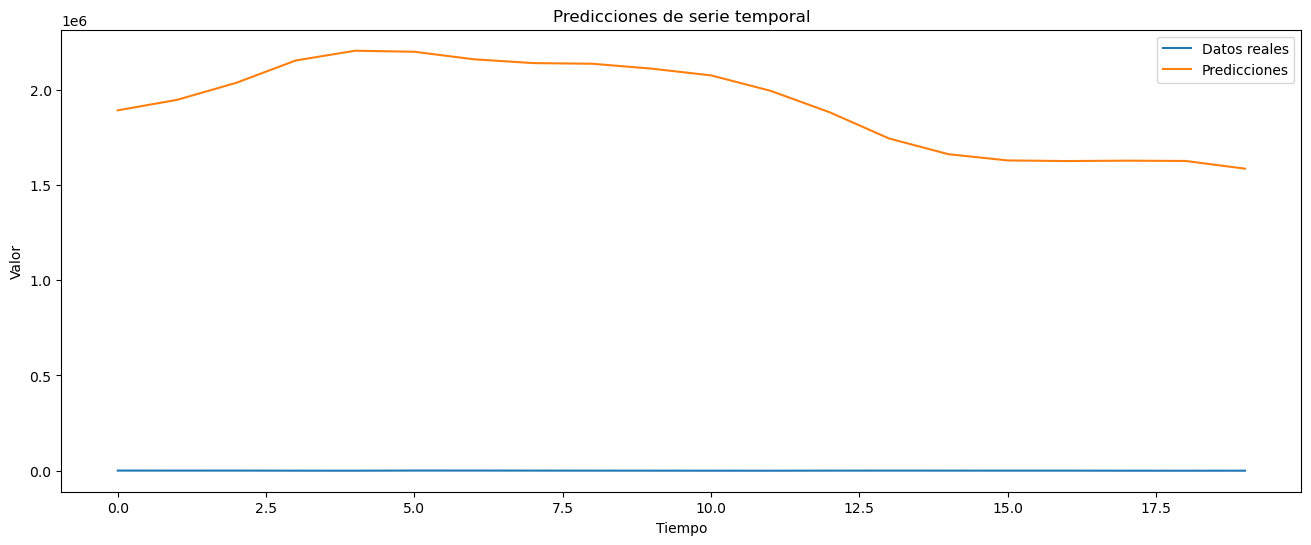

In [219]:
plt.figure(figsize=(16, 6))
plt.plot(test, label='Datos reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones de serie temporal')
plt.legend()
plt.show()